In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
plt.style.use('ggplot')

train = pd.read_csv('../data/train_clean.csv', index_col=0)
test = pd.read_csv('../data/test.csv', index_col=0)


In [14]:
# Make year features continous variables
current_year = 2019
train['HouseAge'] = current_year - train['YearBuilt']
train['RemodelAge'] = current_year - train['YearRemodAdd']
test['HouseAge'] = current_year - test['YearBuilt']
test['RemodelAge'] = current_year - test['YearRemodAdd']

numeric_vars = ['LotArea', 'HouseAge', 'RemodelAge', 'GrLivArea' ]

# subset dfs
continuous_train = train[numeric_vars]
continuous_test = test[numeric_vars]


In [15]:
continuous_train.sample(5)
continuous_test.sample(5)



,LotArea,HouseAge,RemodelAge,GrLivArea
Id,,,,
2292,15431,14,13,2046
2666,6373,13,13,1666
2676,9171,15,14,1598
1584,9375,22,22,2098
2373,8010,16,15,2048


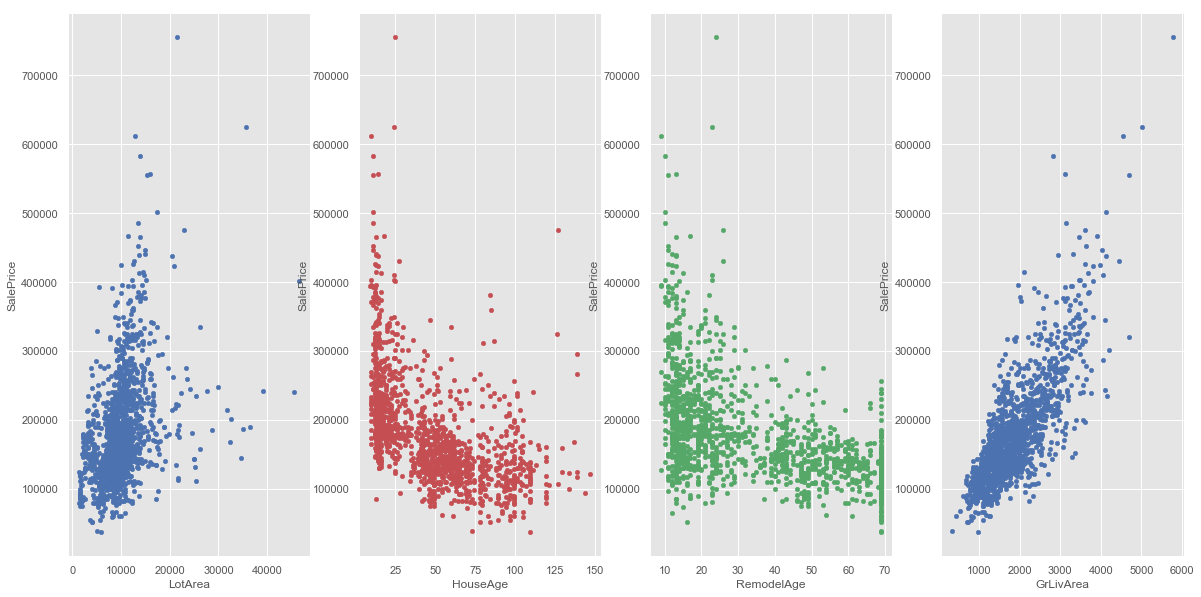

In [16]:
## Visualizing data
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
train.plot(ax=axes[0], kind='scatter', x='LotArea', y='SalePrice',c='b')
train.plot(ax=axes[1], kind='scatter', x='HouseAge', y='SalePrice',c='r')
train.plot(ax=axes[2], kind='scatter', x='RemodelAge', y='SalePrice',c='g')
train.plot(ax=axes[3], kind='scatter', x='GrLivArea', y='SalePrice',c='b')
plt.show()

In [5]:
# Normalize Data



In [12]:
# General summary

X = continuous_train
y = train['SalePrice'] 

X_add_const = sm.add_constant(X)  #add a column with Beta Zero =1

model = sm.OLS(y, X_add_const).fit()
predictions = model.predict(X_add_const) # make the predictions by the model
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     966.3
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:23:42   Log-Likelihood:                -17267.
No. Observations:                1437   AIC:                         3.454e+04
Df Residuals:                    1432   BIC:                         3.457e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.37e+04   4502.079     18.590      0.000    7.49e+04    9.25e+04
LotArea        2.5804      0.255     10.136      0.000       2.081       3.080
HouseAge    -564.8718     44.344    -12.738      0.000    -651.858    -477.886
RemodelAge  -673.5720     64.863    -10.385      0.000    -800.809    -546.335
GrLivArea     63.7336      1.737     36.688      0.000      60.326      67.141
==============================================================================
Omnibus:                      476.607   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3186.207
Skew:                           1.375   Prob(JB):                         0.00
Kurtosis:                       9.756   Cond. No.                     4.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Normalize sale price


Object `normalize` not found.


In [7]:
lm = LinearRegression() 
model = lm.fit(X, y)

print("Intercept: %f" %lm.intercept_)
for i in range(len(X.columns)):
    print("Coefficient: %s : %s" %(lm.coef_[i], list(X.columns)[i]))

print("R^2: %f" %(lm.score(X, y)))

predictions = lm.predict(X)
lm.score(X,y)


Intercept: 83695.193734
Coefficient: 2.580379744575241 : LotArea
Coefficient: -564.8717695159893 : HouseAge
Coefficient: -673.5719693763572 : RemodelAge
Coefficient: 63.73359549035173 : GrLivArea
R^2: 0.729670


0.7296695853751587

In [20]:
# training and test sets

X_train = continuous_train
y_train = train['SalePrice']

X_test = continuous_test



In [26]:
# Model with training and test 

model = LinearRegression()
model.fit(X_train, y_train)

print ('Training score: {}'.format(model.score(X_train, y_train)))
print ('Test score: {}'.format(model.score(X_test, y_test)))


Training score: 0.7232057104642942
Test score: 0.7431170051813005


In [27]:
# Standardize data
# Create Polynomial Feat
# Train and Score models

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.7995520132108133
Test score: 0.8194607402988242


In [24]:
# Ridge Regression
penalty = 1


steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=penalty, fit_intercept=True, normalize=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))



Training Score: 0.6950063226910473
Test Score: 0.7475087703311528


In [11]:
# Lasso Regression
penalty = 1

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=penalty, fit_intercept=True, normalize=True))
]

# pipeline runs data through the listed steps
lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_train)))




Training score: 0.8709435635305891


/Users/kathleensullivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1437, 1459]

In [31]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)

lasso.set_params(normalize=False)
coefs_lasso  = []
intercepts_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)  
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
    


TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
## Logistic Regression

# logit_model = LinearRegression()
# logit_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)